# Статистический анализ данных по аренде самокатов

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - а бонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

**Шаг 1. Загрузка данных**


1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
/datasets/users_go.csv
/datasets/rides_go.csv
/datasets/subscriptions_go.csv


1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.


**Шаг 2. Предобработка данных**


2.1 Приведите столбец date к типу даты pandas.


2.2 Создайте новый столбец с номером месяца на основе столбца date.
2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.


**Шаг 3. Исследовательский анализ данных**


Опишите и визуализируйте общую информацию о пользователях и поездках:


3.1 частота встречаемости городов;


3.2 соотношение пользователей с подпиской и без подписки;


3.3 возраст пользователей;


3.4 расстояние, которое пользователь преодолел за одну поездку;


3.5 продолжительность поездок.


**Шаг 4. Объединение данных**


4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().


4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:


c данными о пользователях без подписки;


с данными о пользователях с подпиской.


4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.


**Шаг 5. Подсчёт выручки**


5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.


5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа. 

**Шаг 6. Проверка гипотез**


Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.


6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.


6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.


6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?




In [1]:
import pandas as pd # импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

####  Загрузка данных

**1.1. Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:**  

- /datasets/users_go.csv
- /datasets/rides_go.csv
- /datasets/subscriptions_go.csv

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv') # прочитаем csv-файлы
data_rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

**1.2. Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.**

In [3]:
def dataset_info(data): # Функция для ознакомления с датафреймом
    
    display(data.head()) # Выведем первые строки
    print('')
    display(data.info()) # Выведем основную информацию
    print('')
    display(data.describe()) # Расчитаем описательную статистику
    print('')
    display(data.isna().sum()) # Выведем количество пропущенных значений для каждого столбца
    print('=====================================================')
    print(len(data)- len(data.drop_duplicates())) # Подсчитаем количество повторяющихся строк в датафрейме
    print('')
    data.hist(figsize=(7, 5)); # Построим гистограмму для всех числовых столбцов таблицы на одном графике.


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

31



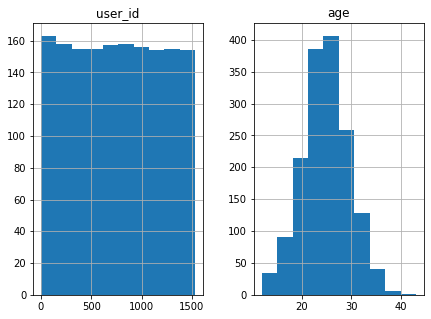

In [4]:
dataset_info(data_users)

**Вывод:**

Таблица содержит 1565 строк, все столбцы заполнены. Правильный тип данных. Есть повторяющиеся строки - 31 шт. 

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


user_id     0
distance    0
duration    0
date        0
dtype: int64

0



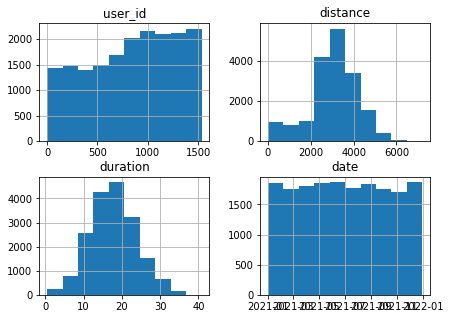

In [5]:
dataset_info(data_rides)

**Вывод:**

Таблица содержит 18068 строк, все столбцы заполнены. Тип данных в столбце 'date' заменили  на datetime64 при импортировании csv-файла. Дубликаты отсутствуют. 'duration' менее 0,5 нужно проверить.

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

0



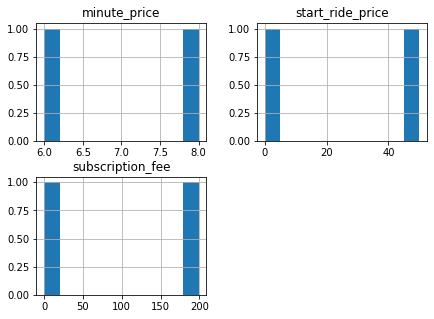

In [6]:
dataset_info(data_sub)

**Вывод:**

Таблица содержит 2 строки, все столбцы заполнены. Тип данных правильный. Дубликаты отсутствуют.  

####  Предобработка данных

**2.1. Приведите столбец date к типу даты pandas.**

In [7]:
#data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**2.2 Создайте новый столбец с номером месяца на основе столбца date.**

In [8]:
data_rides['month'] = data_rides['date'].dt.month
display(data_rides.head(10))

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


**Проверим, за какой период собраны данные в 'date' методом value_counts()**

In [9]:
data_rides['date'].value_counts()

2021-12-22    72
2021-01-12    70
2021-12-27    69
2021-08-20    67
2021-06-09    67
              ..
2021-11-07    35
2021-07-30    35
2021-12-15    34
2021-02-02    34
2021-07-03    31
Name: date, Length: 364, dtype: int64

Данные за 2021 г. 

**2.3. Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.**

In [10]:
print(len(data_users)- len(data_users.drop_duplicates())) # Изучим повторяющиеся строки

31


In [11]:
data_users[data_users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [12]:
data_users = data_users.drop_duplicates() # Удалим дубликаты
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


**Проверим повторяющиеся значения в столбце 'user_id'.**

In [13]:
counts = data_users['user_id'].value_counts()
repeated_values = counts[counts > 1]
print(repeated_values)


Series([], Name: user_id, dtype: int64)


In [14]:
counts_1 = data_rides['user_id'].value_counts()
repeated_values_1 = counts_1[counts_1 > 1]
print(repeated_values_1)

1236    27
783     26
1063    26
1204    24
1149    23
        ..
420      3
108      3
412      3
342      2
366      2
Name: user_id, Length: 1534, dtype: int64


In [15]:
data_rides_copy = data_rides.loc[data_rides['user_id'] == 366]
print(data_rides_copy)

      user_id     distance   duration       date  month
3396      366  3493.472950  18.100524 2021-04-12      4
3397      366  2183.771001  18.279237 2021-05-10      5


**Вывод:**

data_users содежит уникальные id в столбце 'user_id'.

В data_rides id повторяются в связи с разной датой совершения поездки - один человек использовал самокат больше 1 раза.



**Проверим уникальность столбца 'city'.**

In [16]:
print(data_users['city'].unique()) 

['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


**Вывод:**

Столбец в едином виде, с уникальными значениями.

**Вывод по предобработке данных:**

- изменили тип данных в data_rides['date'] на datetime64.
- создали новый столбец data_rides['month'].
- удалили дубликаты из data_users.

#### Исследовательский анализ данных

**Опишите и визуализируйте общую информацию о пользователях и поездках:**

**3.1. Частота встречаемости городов**

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


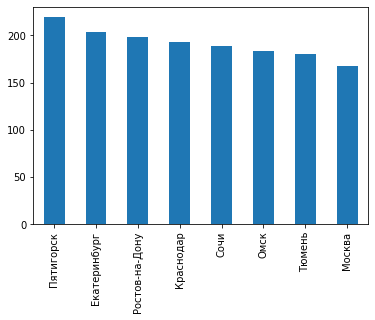

In [17]:
data_users['city'].value_counts().plot(kind='bar');
print(data_users['city'].value_counts().head(10))

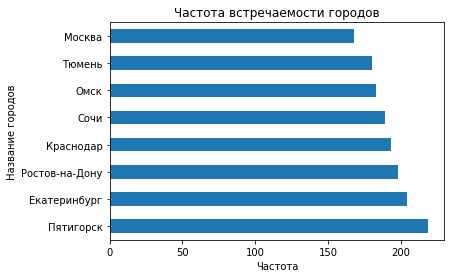

In [18]:
data_users['city'].value_counts().plot(kind='barh');
plt.xlabel('Частота');
plt.ylabel('Название городов');
plt.title('Частота встречаемости городов');

**Вывод:**

Больше всего пользователей в городе Пятигорск - 219, меньше всего в Москве - 168.

**3.2. Соотношение пользователей с подпиской и без подписки.**

free     835
ultra    699
Name: subscription_type, dtype: int64


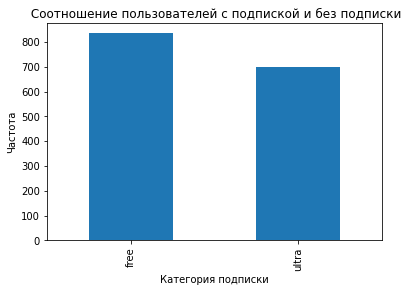

In [19]:
data_users['subscription_type'].value_counts().plot(kind='bar');
print(data_users['subscription_type'].value_counts().head())
plt.title(' Соотношение пользователей с подпиской и без подписки')
plt.ylabel('Частота');
plt.xlabel('Категория подписки');

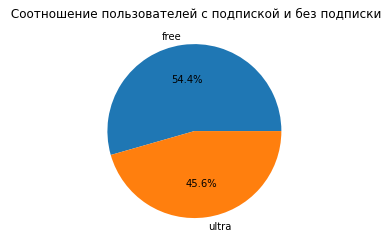

In [20]:
labels = ['free','ultra']
data_users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=labels);
plt.title(' Соотношение пользователей с подпиской и без подписки');
plt.ylabel('');

**Вывод:**

Пользователей без подписки на 9% больше чем пользователей с подпиской. 

**3.3. Возраст пользователей.**

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

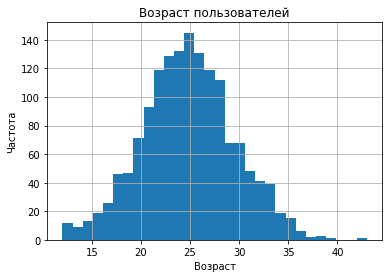

In [21]:
data_users['age'].hist(bins=30);
plt.title('Возраст пользователей')
plt.ylabel('Частота');
plt.xlabel('Возраст');
data_users['age'].describe()

**Вывод:**

Самокатами пользуются люди в возрасте 12-43 лет. Средний возраст пользователей 25 лет. После 35 лет люди реже арендуют самокаты.

Подозрительно, что арендовать самокат могут дети до 14 или 18 лет. Необходимо уточнить информацию у сервиса аренды, как такое возможно.

Данные оставляем, не удаляем, т.к. это может повлиять фин анализ. 

**3.4 Расстояние, которое пользователь преодолел за одну поездку.**

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

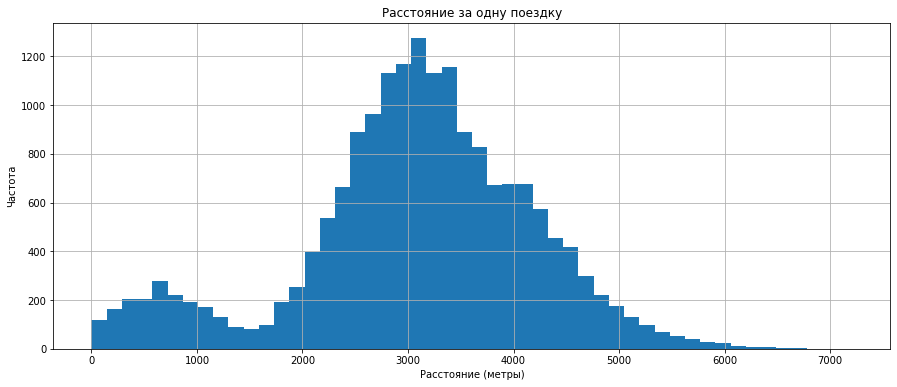

In [22]:
data_rides['distance'].hist(bins=50, figsize=(15, 6));
plt.title('Расстояние за одну поездку')
plt.ylabel('Частота');
plt.xlabel('Расстояние (метры)');
data_rides['distance'].describe()

**Вывод:**

Среднее расстояние за одну поездку - 3 км. Есть пользователи, которые проехали и 7 км. 

Имеется небольшой процент поездак менее метра, возможно это связоно с техническим проблемами самоката. Необходимо уточнить информацию.

Предполагаю, что на расстояние 3 км пользователи арендуют самокат для прогулок, а на расстояние 700 м - как вариант добраться до метро, до автобусной остановки, что бы быстрее добраться на работу/по делам.  Либо, как вариант, часть пользователей в первые арендует самокат, по каким-то причинам им не понравиось и они его вернули. Либо, тут могут быть технические моменты с самокатом, которые становятся заметны после 5-10 минут использования =)

**3.5. Продолжительность поездок.**

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

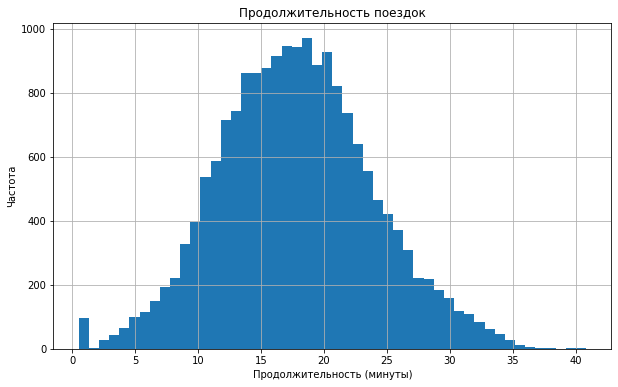

In [23]:
data_rides['duration'].hist(bins=50, figsize=(10, 6));
plt.title('Продолжительность поездок')
plt.ylabel('Частота');
plt.xlabel('Продолжительность (минуты)');
data_rides['duration'].describe()

In [24]:
#Проверим, что с поездками менее 1 минуты
display(data_rides[data_rides['duration']<= 1.0])

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Расстояние у таких поездок примерно 4 км. Удалять аномалии не будем, т.к. это повлияет на рассчёт выручки.


**Вывод:**

Среднея продолжительность поездки - 17 минут. Максимальная - 40, возможно это пользователи, которые проехали больше 7 км.

Так же есть продолжительность менее минуты, возможно это тех проблемы , необходимо уточнить информацию. Выбросы не удаляли для дальнейшего корректного фин анализа, т.к. данные поездки оплачены. 

**Вывод по исследовательскому анализу данных:**

Гистограммы выглядят нормально, без выбросов, есть пару моментов на уточнение - аренда самоката меньше чем на 1 минуту, это технический момент или реальная аренда?

Данные оставляем без изменений. 

#### Объединение данных

**4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().**

In [25]:
# Создадим новый датафрейм data и объеденим data_users и data_rides по столбцу 'user_id'
data = data_users.merge(data_rides, on='user_id')
display(data)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [26]:
#Проверимь количество строк до объединения
(data['user_id'].count())

18068

In [27]:
# Добавим датафрейм data_sub по столбцу 'subscription_type'
data = data.merge(data_sub, on='subscription_type')
display(data)
data.info()
#Проверимь количество строк после объединения
display(data['user_id'].count())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


18068

In [28]:
print(data.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**Все строки объеденились, данные без пропусков.**

In [29]:
# check
data.shape

(18068, 12)

**4.2. Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:**
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [30]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_free = data[data['subscription_type'] == 'free']
display(data_ultra)
print('')
display(data_free)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [31]:
print(data_ultra.isna().sum())
print(data_free.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**Пропуски в таблицах отсутствуют.**

**4.3. Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.**

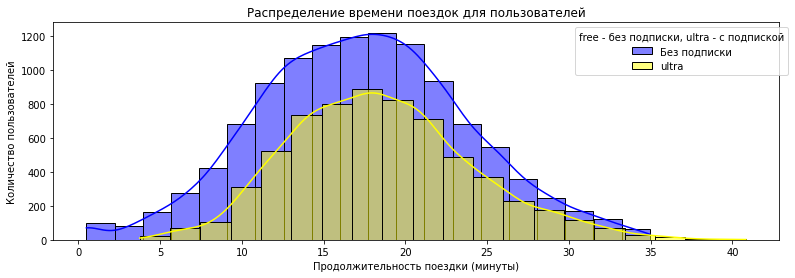

In [32]:
fig, ax = plt.subplots(figsize=(13, 4))
sns.histplot(data_free['duration'], bins=20, color='blue',label='Без подписки', kde=True);
sns.histplot(data_ultra['duration'], bins=20, color='yellow',label='ultra', kde=True);
plt.legend(title='free - без подписки, ultra - с подпиской', bbox_to_anchor=( 1.02 , 1 ));
plt.xlabel('Продолжительность поездки (минуты)');
plt.ylabel('Количество пользователей');
plt.title('Распределение времени поездок для пользователей');


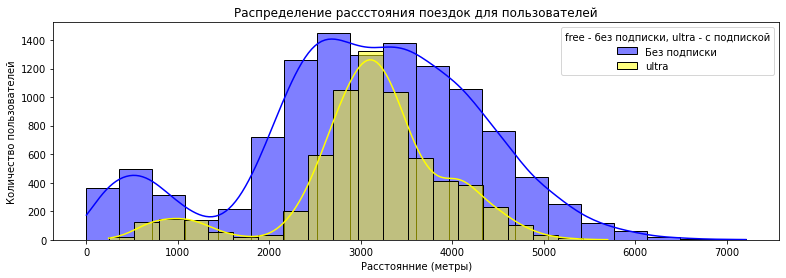

In [33]:
fig, ax = plt.subplots(figsize=(13, 4))
sns.histplot(data_free['distance'], bins=20, color='blue',label='Без подписки', kde=True);
sns.histplot(data_ultra['distance'], bins=20, color='yellow',label='ultra', kde=True);

plt.legend(title='free - без подписки, ultra - с подпиской');
plt.xlabel('Расстоянние (метры)');
plt.ylabel('Количество пользователей');
plt.title('Распределение рассстояния поездок для пользователей');


In [34]:
display(data_ultra.describe())
print('==================================================================')
display(data_free.describe())

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


**Вывод:**

Категория людей без подписки, больше чем категория с подпиской.

Распределение времени почти одинаковое, среднее время поездки - 17-18 минут. У пользователей без подписки наблюдается минимальное время 0,5, в то врем как у второй категории почти 4 минуты.  

Распределение расстояния отличается. Категория без подписки совершает поездки на дальние расстояния - 7 км, в то время как пользователи с подпиской на 5,6 км. Расстояния на 1,5 - 2 км больше совершают люди без подписки. Среднее растояние почти одинаковое - 3-3,1 км. 

####  Подсчёт выручки

**5.1. Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [35]:
# Округлим данные в 'duration'
data['duration'] = np.ceil(data['duration'])
display(data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [36]:
# Создадим сводную таблицу data_sum и добавим столбцы 'sum_distance', 'sum_duration', 'count_rides'
data_sum = pd.pivot_table(data, 
                          index = ['user_id', 'month'], 
                          values = ['duration', 'distance', 'subscription_type', 'minute_price', 
                                    'start_ride_price', 'subscription_fee', 'name'], 
                          aggfunc = {
                              'distance': sum, 
                              'duration' : sum,
                              'name' : len,
                              'subscription_type' : 'first',
                              'minute_price' : 'first',
                              'start_ride_price' : 'first',
                              'subscription_fee' : 'first'
                          })


data_sum = data_sum.reset_index()
data_sum.rename(columns = {'distance': 'sum_distance', 'duration': 'sum_duration', 'name': 'count_rides'}, inplace = True)

# Округлим данные в 'sum_duration'
#data_sum['sum_duration'] = np.ceil(data_sum['sum_duration'])

display(data_sum)

,user_id,month,sum_distance,sum_duration,minute_price,count_rides,start_ride_price,subscription_fee,subscription_type
0,1,1,7027.511294,42.0,6,2,0,199,ultra
1,1,4,754.159807,7.0,6,1,0,199,ultra
2,1,8,6723.470560,46.0,6,2,0,199,ultra
3,1,10,5809.911100,32.0,6,2,0,199,ultra
4,1,11,7003.499363,56.0,6,3,0,199,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,8,2,50,0,free
11327,1534,8,7622.453034,48.0,8,2,50,0,free
11328,1534,9,4928.173852,23.0,8,1,50,0,free
11329,1534,11,13350.015305,78.0,8,4,50,0,free


**5.2. В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.**

In [37]:
data_sum['revenue'] = (data_sum['start_ride_price'] * data_sum['count_rides']) + \
    (data_sum['minute_price'] * data_sum['sum_duration']) + data_sum['subscription_fee'] 
display(data_sum)

,user_id,month,sum_distance,sum_duration,minute_price,count_rides,start_ride_price,subscription_fee,subscription_type,revenue
0,1,1,7027.511294,42.0,6,2,0,199,ultra,451.0
1,1,4,754.159807,7.0,6,1,0,199,ultra,241.0
2,1,8,6723.470560,46.0,6,2,0,199,ultra,475.0
3,1,10,5809.911100,32.0,6,2,0,199,ultra,391.0
4,1,11,7003.499363,56.0,6,3,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,8,2,50,0,free,308.0
11327,1534,8,7622.453034,48.0,8,2,50,0,free,484.0
11328,1534,9,4928.173852,23.0,8,1,50,0,free,234.0
11329,1534,11,13350.015305,78.0,8,4,50,0,free,824.0


In [38]:
# Посчитаем суммарную выручку
data_sum['revenue'].sum()

3878641.0

**Вывод:**

Суммараная выручка по всем пользователям - 3 878 641.0

#### Проверка гипотез

**Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.**

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Запишем врем на поездки 'duration' в отдельные таблицы, по каждой категории подписки из датафреймов data_ultra и data_free.

Проверим гипотезу о том, что пользователи с подпиской тратят больше времени на поездки.

Нулевая гипотеза: среднее значение потраченного времени пользователей из двух категорий равны.

Альтернативная гипотеза: среднее значение потраченного времени пользователей с подпиской больше, чем среднее значение потраченного времени пользователей без подписки.

Чтобы проверить такую гипотезу, передадим в метод ttest_ind()сначала выборку времени пользователей с подпиской (duration_ultra), затем выборку времени пользователей без подписки (duration_free). В качестве alternative укажем 'greater', то есть «больше».



In [39]:
# задаём уровень значимости
alpha = 0.05

# время группы пользователей (с подпиской)
duration_ultra = data_ultra['duration']

# время группы пользователей (без подписки)
duration_free = data_free['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [40]:
duration_ultra

0       25.599769
1       15.816871
2        6.232113
3       18.511000
4       26.265803
          ...    
6495    24.671163
6496    15.892886
6497    14.389525
6498    15.839579
6499    25.217345
Name: duration, Length: 6500, dtype: float64

In [41]:
# Проверка для себя (не знаю, корректно ли так делать)
print(duration_ultra.mean())
print(duration_free.mean())

18.54198516280583
17.39090929866399


**Вывод:**

Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки. Больше потраченного времени, больше выручка, что очень выгодно для бизнесса. 

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

Запишем расстояние поездок 'duration' в отдельную таблицу,  из датафрейма data_ultra.

Создадим переменную distance со значением 3 130 м.

Проверим гипотезу о том, что пользователи с подпиской проезжают менее 3 130 м за одну поездку.

Нулевая гипотеза: среднее расстояние поездки пользователей с подпиской равно 3 130 м.

Альтернативная гипотеза: среднее расстояние поездки пользователей с подпиской более 3 130 м.

Чтобы проверить такую гипотезу, передадим в метод ttest_1samp()сначала выборку расстояния с подпиской (distance_ultra), затем переменную distance . В качестве alternative укажем 'greater', то есть «больше», что бы проверить,  приводит к повышенному износу самоката большее расстояние или нет. 

In [42]:
distance_ultra = data_ultra['distance']
distance = 3130

alpha = 0.5

results = st.ttest_1samp(distance_ultra, distance, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние одной поездки меньше 3 150 м.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи проезжают больше 3 150 м.')


p-value: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: пользователи проезжают больше 3 150 м.


In [43]:
# Проверка для себя (не знаю, корректно ли так делать)
print(distance_ultra.mean())
print(distance)

3115.4453880370247
3130


**Вывод:**

Полученное значение p-value 0.91953 больше заданного уровня значимости, поэтому не получилось отвергнуть нулевую гипотезу, что подтверждает, что среднее расстояние одной поездки пользователей с подпиской меньше 3 150 м. Это говорит о том, что пользователи, в среднем, не совершают длительных поездок, а значит, оборудование меньше изнашивается, меньше необходимо средст для ремонта или замены самокатов или комплектующих.


**6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

Запишем помесячную выручку 'revenue' в отдельные таблицы по категориям подписки, из датафрейма data_sum.


Проверим гипотезу о том, что помесячная выручка пользователи с подпиской выше, чем выручка от пользователей без подписки.

Нулевая гипотеза: помесячная выручка пользователей из двух категорий равна.

Альтернативная гипотеза: помесячная выручка пользователей с полпиской выше чем чем выручка от пользователей без подписки

Чтобы проверить такую гипотезу, передадим в метод ttest_ind()сначала выборку выручки пользователей с подпиской (sum_ultra), затем выборку выручки пользователей без подписки (sum_free). В качестве alternative укажем 'greater', то есть «больше».



In [44]:
sum_ultra = data_sum.loc[data_sum['subscription_type']=='ultra', 'revenue']
sum_free = data_sum.loc[data_sum['subscription_type']=='free', 'revenue']

# задаём уровень значимости
alpha = 0.05

results = st.ttest_ind(sum_ultra, sum_free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [45]:
sum_ultra

0       451.0
1       241.0
2       475.0
3       391.0
4       535.0
        ...  
4528    301.0
4529    469.0
4530    385.0
4531    295.0
4532    355.0
Name: revenue, Length: 4533, dtype: float64

In [46]:
print(sum_ultra.mean())
print(sum_free.mean())

362.7921906022502
328.6413651073845


**Вывод:**

Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Стоит обратить внимание на пользователей без подписки и , возможно, провести акции для привлечения людей к оформлению подписки или её продлению.  


**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Что бы проверить гипотезу о равентве среднего генеральной совокупности для зависимых выборок, применим метод st.ttest_rel().

Передадим два параметра - данные до и после обновления. Набор данных должен быть одинаковым по размеру.

before = [......]

after = [......]

alpha = 0.05

results = st.ttest_rel(before,after)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:

    print('Отвергаем нулевую гипотезу о равенстве обращений в техподдержку')
    
else:

    print('Не получилось отвергнуть нулевую гипотезу')

**Общий вывод.**

Мы изучили данные сервиса аренды самокатов GoFast - обработали датафреймы, заменили тип данных и избавились от дублей.

Исследовали, что больше всего пользователей арендующих самокаты в городе Пятигорск - 219, меньше всего в Москве - 168. 

Пользователей без подписки на 9% больше чем пользователей с подпиской. 

Средний возраст людей - 25 лет. Люди после 35 реже арендуют самокаты. Есть странные данные о возрасте 12 лет. Данную информацию необходимо уточнить у сервиса, как дети до 14/18 лет могут арендовать самокат.

Средняя продолжительность поездки - 17 минут. Среднее расстояние - 3 км. Имеются некоторые выбросы в виде аренды на 1 минуту и расстоянии 1 м. Данную информацию так же необходимо уточнить у сервиса. Возможна техническая поломка оборудования или взлом самоката.

Для удобной работы с данными, разделили пользователей по категориям - с подпиской и без, добавили столбцы с суммарным расстоянием, количеством поездок и сумарном времени для каждого пользователя. Добавили столбец выручки по месяцам.

**Посчитали сумарную выручку по всем пользователям - 3 878 641,00**

Проверили гипотезы:
-  Пользователи с подпиской тратят больше времени на поездки, чем люди без подписки.
-  Среднее расстояние одной поездки пользователей с подпиской не превышает 3 150 м.
-  Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Стоит предложить акции, рекламы для пользователей без подписки, на неё подключение или продление.** 


P.S. не знакю на сколько корректный расчёт выручки, т.к. в таблице не совсем понятно, как люди платят за пдписку. Если у них подписка, они должны платить за неё ежемесячно, но в данных некоторые месяцы пропущены и не понятно, платили они 199 руб. или нет. т.к. в проете этот момент не обозначен, выручки считала из того, что есть. 

Так же не избавлялась от выбросов - 12 лет пользователю, 1 минута использования с расстоянием 4 км. Возможно это технические моменты, или кто-то мог взломать систему и бесплатно покататься =) т.к. все эти данные влияют на выручку, их не удаляла. 
